<a href="https://colab.research.google.com/github/nam3762/odyssey-ai/blob/main/supervision_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 설정

## 첫 설정

In [1]:
import torch
from PIL import Image
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Supervision 설치

In [2]:
!pip install supervision

from IPython.display import clear_output, display, Image
import io

import supervision as sv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 2.1 MB/s eta 0:00:00


## YOLOv5 설치 후 모델 불러오기

In [3]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Cloning into 'yolov5'...
remote: Enumerating objects: 16078, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 16078 (delta 6), reused 9 (delta 1), pack-reused 16056
Receiving objects: 100% (16078/16078), 14.72 MiB | 15.24 MiB/s, done.
Resolving deltas: 100% (11038/11038), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.9/645.9 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-11-28 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 131MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


# YOLOv8 설치 후 모델 불러오기

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 77.6MB/s]


# 샘플 mp4 영상 다운로드 후 경로 설정

In [4]:
import os
HOME = os.getcwd()
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr" -O market-square.mp4 && rm -rf /tmp/cookies.txt
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=10pVQ9rSIJOOV69J8zkp9svozXfaa7-4w' -O sample_mall.mp4


# SAMPLE_VIDEO_PATH = f"{HOME}/sample_mall.mp4"
SAMPLE_VIDEO_PATH = f"{HOME}/market-square.mp4"
SAMPLE_IMAGE_PATH = f"{HOME}/sample_photo.png"

/content/yolov5
--2023-11-28 04:07:32--  https://docs.google.com/uc?export=download&confirm=&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr
Resolving docs.google.com (docs.google.com)... 173.194.193.102, 173.194.193.139, 173.194.193.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.193.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u2ckr2mg6l325fi0a28qkc2i391hkhm9/1701144450000/04309230031174164349/*/1vVrEVMxucHgqGd7vAa501ASojbeGPhIr?e=download&uuid=1a441f0f-fc85-40f6-afc7-61808767b9e5 [following]
--2023-11-28 04:07:33--  https://doc-0k-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u2ckr2mg6l325fi0a28qkc2i391hkhm9/1701144450000/04309230031174164349/*/1vVrEVMxucHgqGd7vAa501ASojbeGPhIr?e=download&uuid=1a441f0f-fc85-40f6-afc7-61808767b9e5
Resolving doc-0k-ag-docs.googleusercontent.com (doc-0k-ag-docs.googleusercontent.com).

# 영상 분석

## 준비

In [5]:
# 색 설정
colors = sv.ColorPalette.default()

# 비디오 파일 정보 추출
video_info = sv.VideoInfo.from_video_path(SAMPLE_VIDEO_PATH)

## Polygon 형태로 구역 나누기

## Polygon - 구역별

In [6]:
polygons = [
    np.array([ # 상단
        [0,0],
        [0,882],
        [384,772],
        [713,707],
        [1150,683],
        [1490,715],
        [2160,588],
        [2160,0]
    ], np.int32),
    np.array([ # 중앙 광장
        [0,882],
        [384,772],
        [713,707],
        [1150,683],
        [1490,715],
        [2160,588],
        [2160,2981],
        [2006,3030],
        [1722,3113],
        [1300,3150],
        [915,3133],
        [456,3060],
        [0,2890],

    ], np.int32),
    np.array([ # 분수대
        [648,1304],
        [840, 1130],
        [1123,1076],
        [1400,1100],
        [1581,1335],
        [1545,1545],
        [1284,1738],
        [920,1727],
        [645,1521]
    ], np.int32),
    np.array([ # 하단
        [0,2890],
        [456,3060],
        [915,3133],
        [1300,3150],
        [1722,3113],
        [2006,3030],
        [2160,2981],
        [2160,3840],
        [0,3840]
    ], np.int32)
]

## Polygon - 무작위 구역

In [7]:
# numpy의 배열 형식으로 다각형의 폴리곤 형태 정의
polygons = [
    np.array([
        [540,  985 ],
        [1620, 985 ],
        [2160, 1920],
        [1620, 2855],
        [540,  2855],
        [0,    1920]
    ], np.int32),
    np.array([
        [0,    1920],
        [540,  985 ],
        [0,    0   ]
    ], np.int32),
    np.array([
        [1620, 985 ],
        [2160, 1920],
        [2160,    0]
    ], np.int32),
    np.array([
        [540,  985 ],
        [0,    0   ],
        [2160, 0   ],
        [1620, 985 ]
    ], np.int32),
    np.array([
        [0,    1920],
        [0,    3840],
        [540,  2855]
    ], np.int32),
    np.array([
        [2160, 1920],
        [1620, 2855],
        [2160, 3840]
    ], np.int32),
    np.array([
        [1620, 2855],
        [540,  2855],
        [0,    3840],
        [2160, 3840]
    ], np.int32)
]




# Zone 선언

In [8]:
zones = [
    sv.PolygonZone(
        polygon=polygon,
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone,
        color=colors.by_idx(index),
        thickness=8,
        text_thickness=8,
        text_scale=4
    )
    for index, zone
    in enumerate(zones)
]
bounding_box_annotators = [
    sv.BoundingBoxAnnotator(
        color=colors.by_idx(index),
        thickness=6
        )
    for index
    in range(len(polygons))
]
label_annotators = [
    sv.LabelAnnotator(
        color=colors.by_idx(index),
        text_thickness=4,
        text_scale=2
    )
    for index
    in range(len(polygons))
]
ellipse_annotators = [
    sv.EllipseAnnotator(
      color=colors.by_idx(index),
      thickness=4,
      )
    for index
    in range(len(polygons))
]
trace_annotators = [
    sv.TraceAnnotator(
      color=colors.by_idx(index),
      trace_length=50,
      thickness=4
    )
    for index
    in range(len(polygons))
]
mask_annotators = [
    sv.MaskAnnotator(
      color=colors.by_idx(index),
    )
    for index
    in range(len(polygons))
]
halo_annotators = [
    sv.HaloAnnotator(
      color=colors.by_idx(index),
    )
    for index
    in range(len(polygons))
]

## 인식

In [10]:
tracker = sv.ByteTrack()

# 각 zone에 대한 체류 시간을 저장하는 2차원 배열 초기화
zone_durations = [[] for _ in range(len(polygons))]
total_people = 0

each_coord = []

def add_coordinates(detections, frame_number):
    global each_coord

    each_coord.append([])

    for detection in detections:

        # 각 검출 결과의 바운딩 박스 좌표를 추출
        coord = detection[0]


        # 중심점과 바닥점의 y좌표 계산
        center_x = int((coord[0] + coord[2]) / 2)
        bottom_y = int(coord[3])

        # 추적 ID 추출
        tracker_id = detection[4]

        # print(center_x)
        # print(bottom_y)
        # print("")

        # 각 좌표와 추적 ID, 프레임 번호를 each_coord에 추가
        each_coord[-1].append((frame_number, tracker_id, center_x, bottom_y))


def process_frame(frame: np.ndarray, i) -> np.ndarray:
  if i < 24:
    print(f"Processing frame {i}...")

    global each_coord

    # 탐지
    results = model(frame, size=1280)
    detections = sv.Detections.from_yolov5(results)
    detections = detections[(detections.class_id == 0) & (detections.confidence > 0.2)]
    detections = tracker.update_with_detections(detections)

    # 전체 사람 수를 누적
    global total_people
    total_people += len(detections)



    labels = [
      "person"
      # results.names[class_id]
      for class_id
      in detections.class_id
    ]

    if i % 4 == 0:
        add_coordinates(detections, i)

    for idx, (zone, zone_annotator, halo_annotator,ellipse_annotator, trace_annotator,  mask_annotator, box_annotator, label_annotator) in enumerate(zip(zones, zone_annotators,halo_annotators, ellipse_annotators, trace_annotators,  mask_annotators, bounding_box_annotators, label_annotators)):
        mask = zone.trigger(detections=detections)
        detections_filtered = detections[mask]

        # print(str(i) + " : " + str(idx)) # 프레임 수 - Zone
        # print(detections_filtered)
        # print("")

        frame = mask_annotator.annotate(scene=frame.copy(), detections=detections_filtered)
        frame = halo_annotator.annotate(scene=frame.copy(), detections=detections_filtered)
        frame = trace_annotator.annotate(scene=frame.copy(), detections=detections_filtered)
        # frame = ellipse_annotator.annotate(scene=frame.copy(), detections=detections_filtered)
        frame = box_annotator.annotate(scene=frame.copy(), detections=detections_filtered)
        # frame = label_annotator.annotate(scene=frame.copy(), detections=detections_filtered, labels=labels)
        frame = zone_annotator.annotate(scene=frame.copy())

        # 현재 프레임에서 해당 zone에서 감지된 사람의 수를 배열에 추가
        zone_durations[idx].append(len(detections_filtered))

    # for idx, (zone, zone_annotator, box_annotator) in enumerate(zip(zones, zone_annotators, box_annotators)):
    #     mask = zone.trigger(detections=detections)
    #     detections_filtered = detections[mask]
    #     frame = box_annotator.annotate(scene=frame, detections=detections_filtered, skip_label=True)
    #     frame = zone_annotator.annotate(scene=frame)

    #     # 현재 프레임에서 해당 zone에서 감지된 사람의 수를 배열에 추가
    #     zone_durations[idx].append(len(detections_filtered))

    # 실시간으로 프레임 출력
    # clear_output(wait=True)
    # _, buffer = cv2.imencode('.jpg', frame)
    # display(Image(data=buffer.tobytes()))


    return frame


# mp4 파일로 출력
sv.process_video(source_path=SAMPLE_VIDEO_PATH, target_path=f"{HOME}/market-square-result.mp4", callback=process_frame)

for idx, durations in enumerate(zone_durations):
    ratio = sum(durations)/total_people * 100
    print(f"Zone {idx + 1} total duration: {ratio:.1f}%")

for coords in each_coord:
  print(coords)





# 24 프레임만 출력
# for i in range(24):
#     frame = next(iterator)
#     _, buffer = cv2.imencode('.jpg', frame)
#     display(Image(data=buffer.tobytes()))


Processing frame 0...
Processing frame 1...
Processing frame 2...
Processing frame 3...
Processing frame 4...
Processing frame 5...
Processing frame 6...
Processing frame 7...
Processing frame 8...
Processing frame 9...
Processing frame 10...
Processing frame 11...
Processing frame 12...
Processing frame 13...
Processing frame 14...
Processing frame 15...
Processing frame 16...
Processing frame 17...
Processing frame 18...
Processing frame 19...
Processing frame 20...
Processing frame 21...
Processing frame 22...
Processing frame 23...
Zone 1 total duration: 33.2%
Zone 2 total duration: 10.9%
Zone 3 total duration: 6.1%
Zone 4 total duration: 16.1%
Zone 5 total duration: 9.9%
Zone 6 total duration: 8.9%
Zone 7 total duration: 15.1%
[(0, 89, 492, 953), (0, 90, 413, 314), (0, 91, 145, 796), (0, 92, 1426, 3771), (0, 93, 1103, 3563), (0, 94, 1689, 3650), (0, 95, 130, 2183), (0, 96, 1837, 3697), (0, 97, 1573, 3234), (0, 98, 583, 993), (0, 99, 1347, 1566), (0, 100, 736, 1524), (0, 101, 332, 

In [11]:
from google.colab.patches import cv2_imshow

# 이미지 불러오기
image = cv2.imread(SAMPLE_IMAGE_PATH)

results = model(image)
person_boxes = results.pandas().xyxy[0]

for box in person_boxes.values:
  x1, y1, x2, y2, _, _, _ = box
  cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)
cv2_imshow(image)

AttributeError: ignored

ex

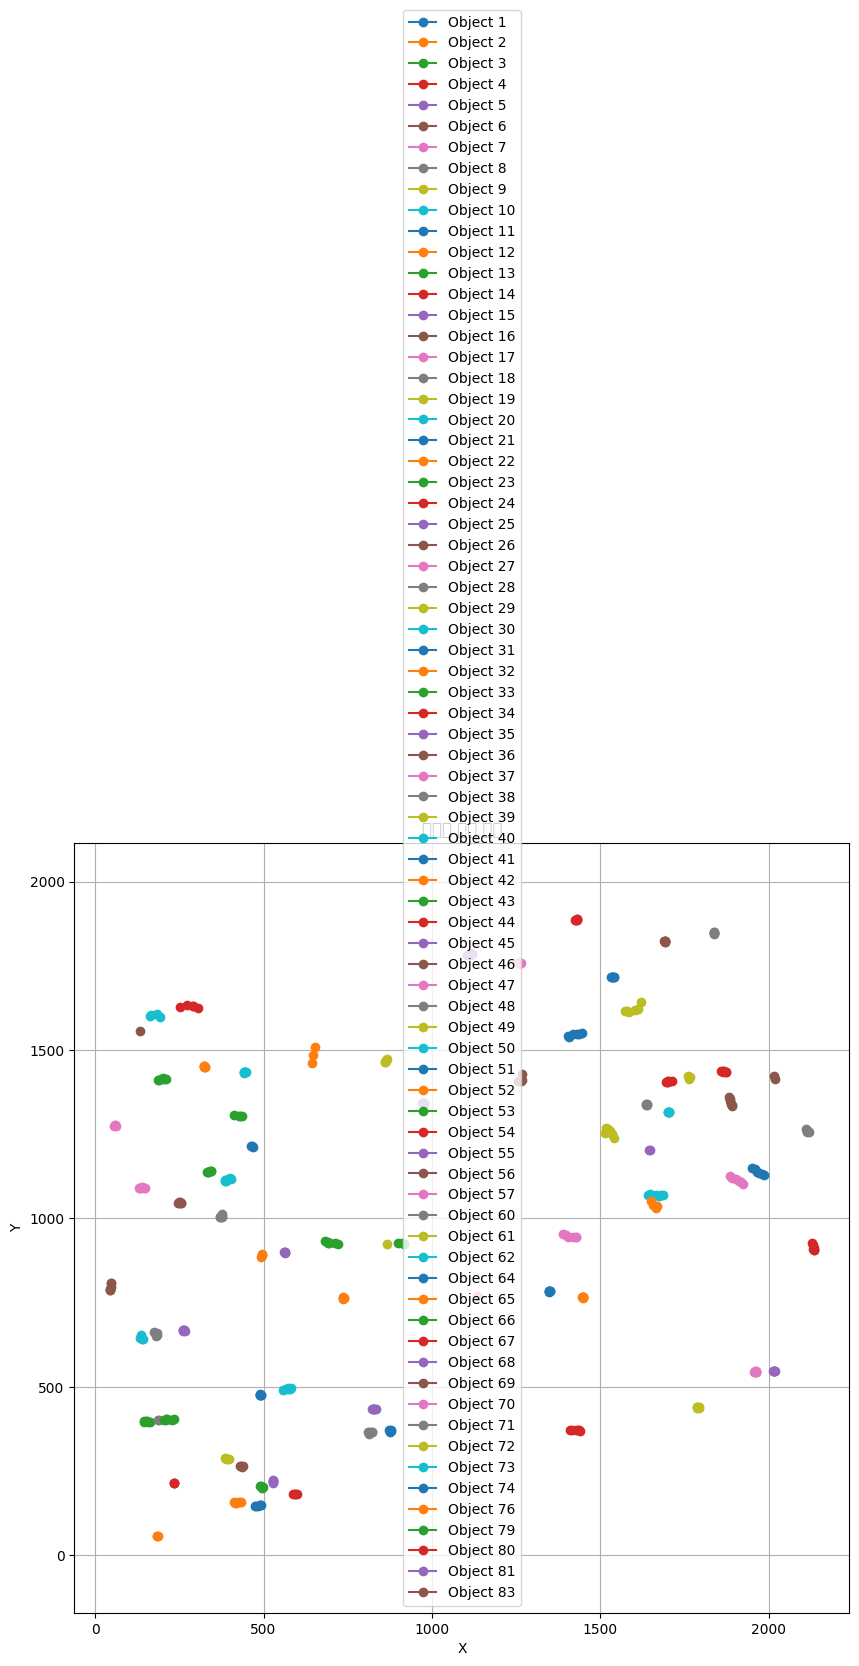

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# 'coords' 리스트에 저장된 좌표 (프레임 별로 구분됨)
coords = [
    [(0, 1, 492, 953), (0, 2, 413, 314), (0, 3, 145, 796), (0, 4, 1426, 3771), (0, 5, 1103, 3563), (0, 6, 1689, 3650), (0, 7, 130, 2183), (0, 8, 1837, 3697), (0, 9, 1573, 3234), (0, 10, 583, 993), (0, 11, 1347, 1566), (0, 12, 736, 1524), (0, 13, 332, 2275), (0, 14, 304, 3247), (0, 15, 262, 1337), (0, 16, 246, 2092), (0, 17, 1262, 3517), (0, 18, 188, 801), (0, 19, 866, 2946), (0, 20, 385, 2226), (0, 21, 1536, 3433), (0, 22, 324, 2906), (0, 23, 233, 808), (0, 24, 1440, 735), (0, 25, 2014, 1092), (0, 26, 1883, 2719), (0, 27, 1957, 1090), (0, 28, 823, 731), (0, 29, 1786, 880), (0, 30, 447, 2871), (0, 31, 1403, 3084), (0, 32, 1447, 1533), (0, 33, 683, 1866), (0, 34, 2132, 1816), (0, 35, 834, 866), (0, 36, 43, 1577), (0, 37, 1428, 1889), (0, 38, 370, 2009), (0, 39, 867, 1851), (0, 40, 1687, 2140), (0, 41, 1949, 2300), (0, 42, 1668, 2075), (0, 43, 499, 407), (0, 44, 1872, 2868), (0, 45, 973, 2683), (0, 46, 1257, 2816), (0, 47, 1886, 2252), (0, 48, 2119, 2513), (0, 49, 1515, 2508), (0, 50, 1703, 2630), (0, 51, 476, 295), (0, 52, 186, 113), (0, 53, 186, 2820), (0, 54, 1701, 2811)],
[(4, 1, 491, 952), (4, 2, 415, 312), (4, 3, 146, 794), (4, 4, 1429, 3772), (4, 5, 1112, 3567), (4, 6, 1691, 3650), (4, 7, 132, 2183), (4, 8, 1839, 3693), (4, 9, 1578, 3231), (4, 10, 579, 988), (4, 11, 1348, 1567), (4, 12, 735, 1525), (4, 13, 335, 2277), (4, 14, 292, 3259), (4, 15, 262, 1337), (4, 16, 248, 2093), (4, 17, 1263, 3519), (4, 18, 189, 801), (4, 19, 865, 2944), (4, 20, 386, 2223), (4, 21, 1533, 3435), (4, 22, 322, 2901), (4, 23, 227, 806), (4, 24, 1437, 741), (4, 25, 2015, 1093), (4, 26, 1886, 2708), (4, 27, 1962, 1090), (4, 28, 821, 732), (4, 29, 1787, 879), (4, 30, 446, 2871), (4, 31, 1408, 3079), (4, 32, 1450, 1530), (4, 33, 690, 1861), (4, 34, 2133, 1815), (4, 35, 832, 866), (4, 36, 45, 1575), (4, 37, 1428, 1889), (4, 38, 370, 2010), (4, 40, 1681, 2140), (4, 41, 1960, 2293), (4, 42, 1665, 2065), (4, 43, 495, 402), (4, 44, 1873, 2871), (4, 45, 972, 2684), (4, 47, 1892, 2243), (4, 49, 1518, 2537), (4, 50, 1702, 2631), (4, 52, 185, 112), (4, 53, 190, 2824), (4, 54, 1701, 2814), (4, 55, 527, 427), (4, 56, 430, 527), (4, 57, 1135, 1541), (4, 48, 2118, 2522), (4, 51, 478, 294), (4, 46, 1259, 2815)],
[(8, 1, 490, 950), (8, 2, 418, 313), (8, 3, 150, 796), (8, 4, 1429, 3774), (8, 5, 1118, 3568), (8, 6, 1692, 3646), (8, 7, 136, 2182), (8, 8, 1838, 3692), (8, 9, 1584, 3225), (8, 10, 576, 988), (8, 11, 1349, 1568), (8, 12, 735, 1525), (8, 13, 336, 2275), (8, 15, 261, 1334), (8, 16, 250, 2095), (8, 17, 1260, 3514), (8, 19, 863, 2937), (8, 20, 389, 2221), (8, 21, 1535, 3431), (8, 22, 324, 2904), (8, 24, 1433, 742), (8, 25, 2016, 1092), (8, 26, 1884, 2699), (8, 27, 1962, 1091), (8, 28, 813, 730), (8, 29, 1786, 876), (8, 30, 445, 2868), (8, 31, 1419, 3094), (8, 32, 1450, 1532), (8, 33, 690, 1857), (8, 34, 2135, 1815), (8, 35, 829, 867), (8, 36, 44, 1579), (8, 37, 1419, 1891), (8, 38, 373, 2008), (8, 40, 1674, 2134), (8, 41, 1965, 2278), (8, 42, 1656, 2080), (8, 43, 494, 404), (8, 44, 1866, 2876), (8, 45, 974, 2686), (8, 47, 1902, 2232), (8, 49, 1522, 2532), (8, 50, 1701, 2631), (8, 53, 195, 2826), (8, 54, 1701, 2814), (8, 55, 527, 435), (8, 56, 432, 527), (8, 57, 1135, 1539), (8, 60, 182, 1304), (8, 61, 385, 575), (8, 62, 194, 3198), (8, 64, 876, 733), (8, 65, 491, 1770), (8, 51, 483, 294), (8, 46, 1261, 2816), (8, 66, 430, 2606), (8, 67, 598, 363), (8, 68, 563, 1799), (8, 69, 132, 3115), (8, 70, 56, 2548), (8, 71, 1635, 2674), (8, 72, 1764, 2840), (8, 73, 141, 1284), (8, 23, 210, 808), (8, 48, 2113, 2516), (8, 14, 292, 3263)],
[(12, 1, 490, 953), (12, 2, 425, 318), (12, 3, 153, 796), (12, 4, 1430, 3778), (12, 5, 1119, 3570), (12, 6, 1692, 3647), (12, 7, 140, 2185), (12, 8, 1837, 3700), (12, 9, 1604, 3235), (12, 10, 573, 992), (12, 11, 1349, 1569), (12, 12, 737, 1531), (12, 13, 341, 2280), (12, 15, 264, 1338), (12, 16, 252, 2096), (12, 17, 1259, 3515), (12, 19, 863, 2936), (12, 20, 395, 2236), (12, 21, 1538, 3435), (12, 22, 324, 2904), (12, 24, 1428, 741), (12, 25, 2016, 1095), (12, 26, 1887, 2681), (12, 27, 1960, 1094), (12, 28, 814, 720), (12, 29, 1791, 878), (12, 30, 442, 2871), (12, 31, 1431, 3097), (12, 32, 1450, 1531), (12, 33, 694, 1854), (12, 35, 826, 867), (12, 36, 46, 1594), (12, 37, 1405, 1892), (12, 38, 377, 2008), (12, 41, 1970, 2269), (12, 42, 1650, 2101), (12, 43, 494, 406), (12, 44, 1865, 2874), (12, 45, 974, 2688), (12, 47, 1911, 2225), (12, 49, 1528, 2522), (12, 50, 1701, 2632), (12, 53, 201, 2834), (12, 54, 1712, 2814), (12, 55, 528, 441), (12, 56, 437, 526), (12, 57, 1135, 1534), (12, 60, 184, 1308), (12, 61, 389, 574), (12, 62, 183, 3213), (12, 64, 878, 736), (12, 65, 494, 1785), (12, 51, 489, 297), (12, 66, 437, 2609), (12, 67, 594, 365), (12, 68, 563, 1796), (12, 70, 59, 2555), (12, 71, 1639, 2672), (12, 72, 1759, 2846), (12, 73, 138, 1286), (12, 23, 214, 810), (12, 74, 469, 2423), (12, 48, 2113, 2520), (12, 76, 645, 2922), (12, 79, 898, 1854), (12, 80, 233, 431), (12, 40, 1666, 2140), (12, 34, 2133, 1826), (12, 46, 1263, 2817)],
[(16, 1, 490, 956), (16, 2, 430, 319), (16, 3, 157, 790), (16, 4, 1431, 3778), (16, 5, 1115, 3571), (16, 6, 1692, 3644), (16, 7, 145, 2182), (16, 8, 1838, 3702), (16, 9, 1613, 3245), (16, 10, 567, 988), (16, 11, 1350, 1569), (16, 12, 738, 1528), (16, 13, 344, 2280), (16, 15, 265, 1336), (16, 16, 254, 2090), (16, 17, 1257, 3516), (16, 19, 861, 2932), (16, 20, 399, 2241), (16, 21, 1540, 3435), (16, 22, 325, 2902), (16, 24, 1417, 744), (16, 25, 2017, 1094), (16, 27, 1961, 1092), (16, 28, 813, 727), (16, 29, 1792, 879), (16, 30, 441, 2871), (16, 31, 1438, 3097), (16, 32, 1450, 1531), (16, 33, 711, 1854), (16, 35, 824, 867), (16, 36, 48, 1614), (16, 37, 1397, 1899), (16, 38, 378, 2014), (16, 41, 1979, 2262), (16, 43, 492, 412), (16, 44, 1863, 2869), (16, 45, 977, 2685), (16, 47, 1918, 2214), (16, 49, 1534, 2499), (16, 50, 1703, 2633), (16, 53, 204, 2831), (16, 54, 1697, 2813), (16, 55, 528, 444), (16, 56, 440, 531), (16, 57, 1136, 1536), (16, 60, 183, 1317), (16, 61, 394, 573), (16, 62, 167, 3209), (16, 64, 878, 741), (16, 65, 495, 1788), (16, 51, 489, 296), (16, 66, 426, 2610), (16, 67, 592, 365), (16, 68, 565, 1798), (16, 70, 59, 2553), (16, 71, 1638, 2679), (16, 72, 1764, 2831), (16, 73, 134, 1291), (16, 23, 209, 804), (16, 74, 465, 2428), (16, 76, 647, 2968), (16, 79, 910, 1855), (16, 80, 233, 430), (16, 40, 1648, 2143), (16, 81, 1646, 2405), (16, 34, 2131, 1843), (16, 46, 1267, 2822), (16, 83, 2020, 2829), (16, 26, 1890, 2669), (16, 14, 274, 3265), (16, 48, 2112, 2531), (16, 52, 184, 113)],
[(20, 1, 490, 953), (20, 2, 433, 318), (20, 3, 162, 794), (20, 4, 1431, 3774), (20, 5, 1113, 3573), (20, 6, 1691, 3643), (20, 7, 147, 2180), (20, 8, 1839, 3695), (20, 9, 1621, 3288), (20, 10, 559, 981), (20, 11, 1351, 1568), (20, 12, 738, 1526), (20, 13, 345, 2279), (20, 15, 266, 1334), (20, 16, 256, 2089), (20, 17, 1253, 3516), (20, 19, 860, 2931), (20, 20, 403, 2236), (20, 21, 1542, 3436), (20, 22, 325, 2902), (20, 24, 1411, 743), (20, 25, 2018, 1092), (20, 27, 1962, 1089), (20, 28, 811, 733), (20, 29, 1792, 877), (20, 30, 442, 2866), (20, 31, 1447, 3099), (20, 32, 1450, 1531), (20, 33, 721, 1849), (20, 35, 821, 868), (20, 36, 47, 1619), (20, 37, 1388, 1905), (20, 38, 377, 2026), (20, 41, 1986, 2256), (20, 43, 490, 414), (20, 44, 1857, 2875), (20, 45, 977, 2678), (20, 47, 1924, 2205), (20, 49, 1540, 2476), (20, 50, 1703, 2632), (20, 54, 1695, 2812), (20, 55, 529, 439), (20, 57, 1136, 1531), (20, 60, 175, 1325), (20, 61, 396, 570), (20, 62, 163, 3200), (20, 64, 873, 744), (20, 51, 491, 296), (20, 66, 412, 2612), (20, 67, 588, 366), (20, 68, 562, 1800), (20, 71, 1636, 2681), (20, 72, 1765, 2841), (20, 73, 137, 1308), (20, 23, 205, 802), (20, 74, 462, 2429), (20, 79, 917, 1851), (20, 80, 234, 430), (20, 81, 1648, 2406), (20, 34, 2128, 1855), (20, 46, 1268, 2858), (20, 83, 2017, 2847), (20, 26, 1891, 2672), (20, 14, 252, 3253), (20, 65, 494, 1783), (20, 53, 209, 2830), (20, 70, 61, 2549), (20, 76, 652, 3019), (20, 40, 1643, 2139)]
]

# 원근 변환을 위한 소스 및 대상 점 정의
src_points = np.float32([[0, 0], [2000, 0], [2000, 4000], [0, 4000]])
dst_points = np.float32([[0, 0], [2000, 0], [2000, 2000], [0, 2000]])

# 원근 변환 행렬 계산
M = cv2.getPerspectiveTransform(src_points, dst_points)

# 객체별 경로를 저장할 defaultdict 생성
trajectories = defaultdict(list)

# 모든 프레임의 좌표에 대해 처리
for frame_coords in coords:
    for coord in frame_coords:
        frame, obj_id, x, y = coord
        # 좌표에 원근 변환 적용
        transformed_coord = cv2.perspectiveTransform(np.array([[x, y]], dtype='float32').reshape(-1, 1, 2), M)
        # 변환된 좌표를 객체 ID에 맞게 리스트에 추가
        trajectories[obj_id].append((frame, transformed_coord[0][0][0], transformed_coord[0][0][1]))

# 각 객체별로 정렬된 좌표에 따라 경로 그리기
plt.figure(figsize=(10, 10))
for obj_id, path in trajectories.items():
    # 시간에 따라 경로 정렬
    sorted_path = sorted(path, key=lambda x: x[0])
    # 경로의 x, y 좌표를 분리
    x_coords, y_coords = zip(*[(x, y) for _, x, y in sorted_path])

    # 경로를 그림
    plt.plot(x_coords, y_coords, marker='o', label=f'Object {obj_id}')

# 시각화 설정
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('객체별 이동 경로')
plt.grid(True)
plt.axis('equal')  # 축의 스케일을 동일하게 설정

# 결과 표시
plt.show()
